# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [45]:
# Pkg.update()
# Pkg.add("DualNumbers")
using PyPlot
using DualNumbers
include("wbFunctions3.jl");

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

The finite difference formula may be drived by considering Taylor's theorem producing:

$$f(x+h)=f(x)+hf'(x)+\frac{1}{2}h^{2}f''(x)+O(h^3)$$
$$f(x+2h)=f(x)+2hf'(x)+2h^{2}f''(x)+O(h^3)$$

Consider;

$$a_{1}f(x)+a_{2}f(x+h)+a_{3}f(x+2h)=(a_{1}+a_{2}+a_{3})f(x)+h(a_{2}+2a_{3})f'(x)+h^{2}(\frac{1}{2}a_{2}+2a_{3})f''(x)+O(h^{3})$$

The finite difference formula for $f'(x)$ may be found when:

$$a_{1}+a_{2}+a_{3}=0$$
$$a_{2}+2a_{3}=1$$
$$\frac{1}{2}a_{2}+2a_{3}=1$$

Therefore;
$$a_{1}= -\frac{3}{2} \ ,a_{2}= 2, \ a_{3}= -\frac{1}{2}$$

And;

$$f'(x)=\frac{-\frac{3}{2}f(x)+2f(x+h)-\frac{1}{2}f(x+2h)}{h} + O(h^2)$$




In [7]:
function df(x,h) 
    return (2*(sin(exp(x+h)))-0.5*sin(exp(x+2*h))-(3/2)*sin(exp(x)))/h
end;

In [8]:
h=0.01
x=1
println("The derivative of the f(x) at x=1 is ",df(x,h));

The derivative of the f(x) at x=1 is -2.4786017446961184


This result verifies that the function fo f'(x) works as required.

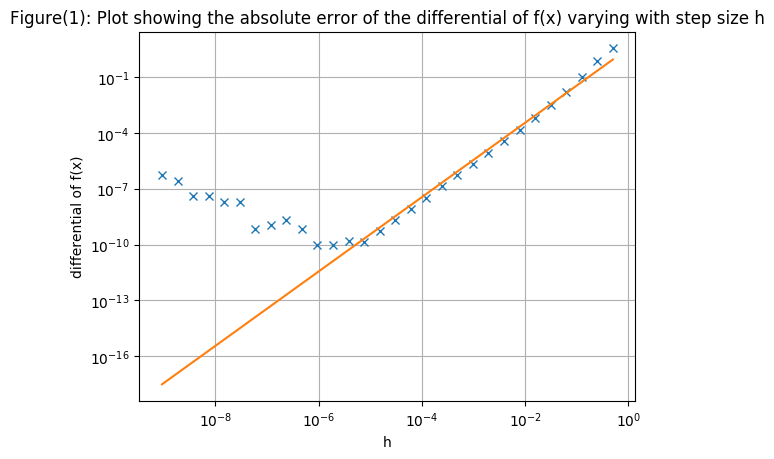

Actual f'(1) = -2.478349732955235


In [42]:
h=zeros(30)
errorf=zeros(30)
actual=cos(exp(1))*exp(1)
println("Actual f'(1) = ",actual)
for i=1:30
    h[i]=2.0^(-i)
    errorf[i]=abs(actual-df(1,h[i]))
end

legend(loc=4)
grid()
yscale("log")
xscale("log")
plot(h,errorf,linestyle=" ", marker="x",label="Numerical error")
plot(h,errorf[1]*h.^2,linestyle="-", label="Theoretical error O(h^2)")
ylabel("differential of f(x)")
xlabel("h");
title("Figure(1): Plot showing the absolute error of the differential of f(x) varying with step size h");

The best relative error achieveable is $O(10^{-5})$ as this is the value for $h$ at which the error begins to increase again.

In [5]:
#x=1+ϵ
x=Dual(1,1)
f(x)=sin(exp(x))
y=f(x)
actual=cos(exp(1))*exp(1)
println("f'(1) = ", dualpart(y))
println("Type of f'(1) = ", typeof(dualpart(y)))
println("Machine precision = ", eps(typeof(dualpart(y))))
println("Error = ", abs(actual-dualpart(y))) # == 0.0 therefore idential to the machine precision


f'(1) = -2.478349732955235
Type of f'(1) = Float64
Machine precision = 2.220446049250313e-16
Error = 0.0


The result verifies that the answer is within machine precision as the error values returned is 0.0 therefore the computation cannot distinguish between the values.

## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

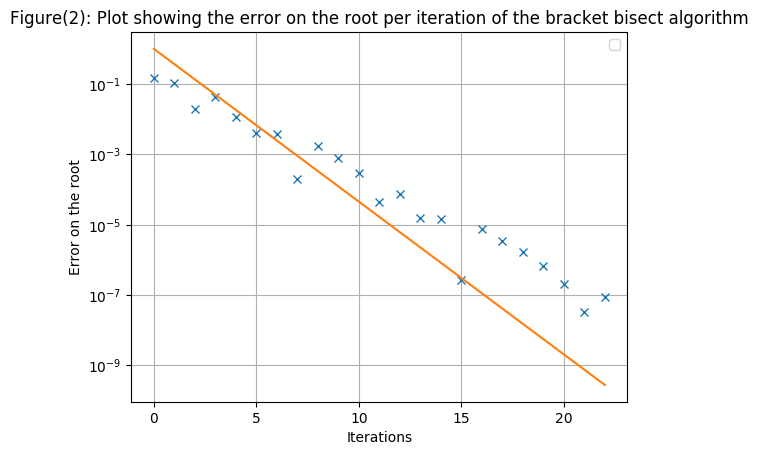

In [39]:
f(x)=sin(exp(x))
interval=[0.5,1.5]
time,error=bracketBisect(interval,f)
legend("on")
grid()
yscale("log")
xlabel("Iterations")
ylabel("Error on the root")
title("Figure(2): Plot showing the error on the root per iteration of the bracket bisect algorithm")
plot(time,error,linestyle=" ",marker="x",label="Numerical error")
plot(time,exp.(-time),label="Theoretical error O(exp(-t))");

Figure(2) shows that the error using the bracket bisect method scales as $O(\exp{(-n)})$ with iteration number n.

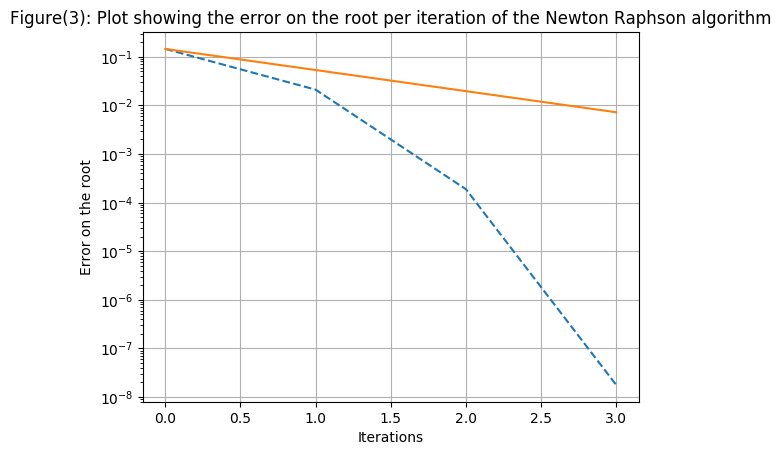

In [43]:
f(x)=sin(exp(x))
fdiff(x)=cos(exp(x))*exp(x)
actual=log(pi)
ϵtol=eps(Float32)
guess=1.0
estimates,time=NewRaph(f,fdiff,ϵtol,guess)
errors=abs.(estimates.-actual)
legend()
grid()
yscale("log")
ylabel("Error on the root")
xlabel("Iterations")
title("Figure(3): Plot showing the error on the root per iteration of the Newton Raphson algorithm")
plot(time,errors,linestyle="--")
plot(time,errors[1]*exp.(-time));


Figure(3) shows that the error using the Newton Raphson method scales faster than $O(\exp{(-n)})$ with iteration number n.

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.

---------------------------------------------------------------------------------------------------------

For $f(x)=sin(exp(x)$;
$$f'(x)=cos(exp(x))exp(x) \ \text{for maxima/minima } \ f'(x)=0$$

$$x=ln\Big(\frac{\pi}{2}(2n+1)\Big)$$

Only minima within the range $0<x<2$ is:
$$x=ln\Big(\frac{3\pi}{2}\Big)$$


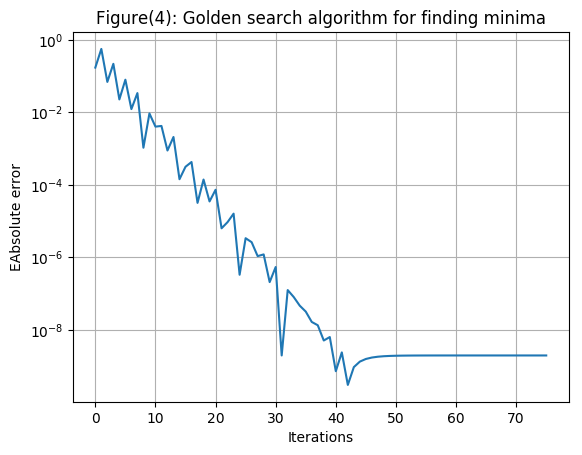

Final minimum estimate = 1.5501949959312864
Actual minimum = 1.5501949939575645
Error of the minimum = 1.9737218526216793e-9


In [47]:
interval=[1.0,2.0]
f(x)=sin(exp(x))
actual=log(3*pi/2)
ϵtol=eps(Float64)

estimates,time=goldenSearch(interval,f,ϵtol)
errors=abs.(estimates.-actual)
yscale("log")
grid()
println("Final minimum estimate = ", estimates[length(estimates)])
println("Actual minimum = ",actual)
println("Error of the minimum = ", errors[length(estimates)])
plot(time,errors)
title("Figure(4): Golden search algorithm for finding minima")
xlabel("Iterations")
ylabel("EAbsolute error");


The final estimate may be calculated to 9 digits of precision.

Near a minimum $x_{*}$ of $f(x)$;
Consider the perturbation $x=x_{*}+h$ where $h=x-x_{*}$ and taylor expanding around $x_{*}$;

$$f(x)=f(x_{*})+hf'(x_{*})+\frac{1}{2}h^{2}f''(x_{*})+O(h^{3})$$

Therefor;

$$f(x) \approx f(x_{*})+\frac{1}{2}(x-x_{*})^2f''(x_{*}) \ \text{as} \ f'(x_{*})=0 \ \text{at mimima}$$

and $$f(x) \approx f(x_{*})\Big(1+\frac{f''(x_{*}}{2f(x_{*}}(x-x_{*})^{2}\Big)$$

At machine precision:

$$ \Big|\frac{f(x)-f(x_{*})}{f(x_{*}}\Big|>\epsilon_{m}$$

$$\Big|1+\frac{f''(x_{*}}{2f(x_{*}}(x-x_{*})^{2}-1\Big|>\epsilon_{m}$$

$$|(x-x_{*})^{2}|>\epsilon_{m}\Big|\frac{2f(x_{*})}{f''(x_{*})}\Big|$$

Therefore;
$$|x-x_{*}|>\sqrt{\epsilon_{m}}\sqrt{\Big|\frac{2f(x_{*})}{f''(x_{*})}\Big|}$$